In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get install unzip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!unzip '/content/drive/My Drive/OPG_nuclear/Research/severstal-steel-defect-detection.zip' -d /content/extracted_files/

Streaming output truncated to the last 5000 lines.
  inflating: /content/extracted_files/train_images/99f75320d.jpg  
  inflating: /content/extracted_files/train_images/99f9d2375.jpg  
  inflating: /content/extracted_files/train_images/99fd3c6f5.jpg  
  inflating: /content/extracted_files/train_images/9a016fe15.jpg  
  inflating: /content/extracted_files/train_images/9a064450d.jpg  
  inflating: /content/extracted_files/train_images/9a08c2783.jpg  
  inflating: /content/extracted_files/train_images/9a18e4457.jpg  
  inflating: /content/extracted_files/train_images/9a1f7c238.jpg  
  inflating: /content/extracted_files/train_images/9a2523ce9.jpg  
  inflating: /content/extracted_files/train_images/9a3e774ff.jpg  
  inflating: /content/extracted_files/train_images/9a5e9e77c.jpg  
  inflating: /content/extracted_files/train_images/9a5f7a855.jpg  
  inflating: /content/extracted_files/train_images/9a62177bb.jpg  
  inflating: /content/extracted_files/train_images/9a67575cf.jpg  
  inflating

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from PIL import Image
import random
import os

In [ ]:
train_df = pd.read_csv("/content/extracted_files/train.csv")

In [ ]:
train_df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [ ]:
filtered_df = train_df[train_df["ClassId"] == 2]

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 9 to 7082
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ImageId        247 non-null    object
 1   ClassId        247 non-null    int64 
 2   EncodedPixels  247 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.7+ KB


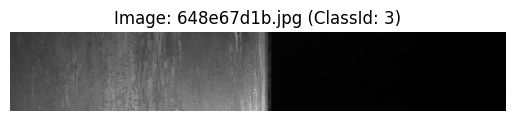

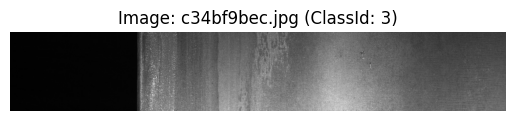

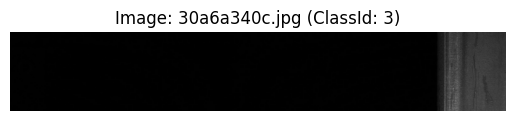

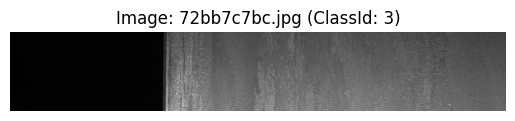

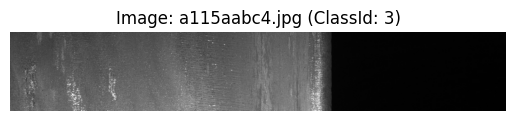

In [ ]:
# Path to the folder containing images
image_folder = "/content/extracted_files/train_images"

# 2. Randomly select a subset of images to display
num_images_to_display = min(5, len(filtered_df))  # Display up to 5 images
selected_images = random.sample(list(filtered_df["ImageId"]), num_images_to_display)

# 3. Display selected images
for image_id in selected_images:
    image_path = os.path.join(image_folder, image_id)
    try:
        # Open and display the image
        image = Image.open(image_path)
        plt.figure()
        plt.title(f"Image: {image_id} (ClassId: 3)")
        plt.imshow(image)
        plt.axis("off")
        plt.show()
    except FileNotFoundError:
        print(f"Image {image_id} not found in {image_folder}.")

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# Path to the folder containing images
image_folder = "/content/extracted_files/train_images"

# Sample DataFrame
data = {
    "ImageId": ["0002cc93b.jpg", "0007a71bf.jpg", "000a4bcdd.jpg", "000f6bf48.jpg", "0014fce06.jpg"],
    "ClassId": [1, 3, 1, 4, 3],
    "EncodedPixels": ["", "18661 28 18863 82", "", "", "229501 11 229741 33"],
}
df = pd.read_csv("/content/extracted_files/train.csv")

# Function to decode RLE (Run-Length Encoding) into a binary mask
def rle_to_mask(rle, shape=(256, 1600)):
    mask = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    if not rle:
        return mask.reshape(shape)

    rle_pairs = [int(num) for num in rle.split()]
    starts, lengths = rle_pairs[::2], rle_pairs[1::2]
    for start, length in zip(starts, lengths):
        mask[start - 1 : start + length - 1] = 1
    return mask.reshape(shape).T



# def visualize_image_with_mask(image_path, mask):
#     """
#     Display an image with masks bounded by rectangles.

#     Args:
#         image_path (str): Path to the image file.
#         mask (numpy.ndarray): Binary mask for the image (2D array).
#     """
#     # Read the image
#     image = cv2.imread(image_path)
#     if image is None:
#         print(f"Image not found: {image_path}")
#         return

#     # Convert BGR to RGB
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#     # Ensure the mask dimensions match the image
#     mask = cv2.resize(mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

#     # Find contours in the mask
#     contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # Draw bounding rectangles and contours on the image
#     for contour in contours:
#         if cv2.contourArea(contour) > 10:  # Ignore very small regions
#             x, y, w, h = cv2.boundingRect(contour)
#             cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue rectangles
#             cv2.drawContours(image, [contour], -1, (0, 255, 0), 1)  # Green contours

#     # Display the image with bounding rectangles
#     plt.figure(figsize=(15, 8))
#     plt.imshow(image)
#     plt.title(f"Image with Mask (Bounded by Rectangles): {os.path.basename(image_path)}")
#     plt.axis("off")
#     plt.show()


# # Filter images with ClassId == 3
# filtered_df = df[df["ClassId"] == 2]

# # Randomly select a subset of images to display
# num_images_to_display = min(5, len(filtered_df))
# selected_images = random.sample(list(filtered_df.itertuples(index=False)), num_images_to_display)

# # Process and display selected images
# for row in selected_images:
#     image_id, class_id, encoded_pixels = row
#     image_path = os.path.join(image_folder, image_id)
#     mask = rle_to_mask(encoded_pixels)
#     visualize_image_with_mask(image_path, mask)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def combine_and_unify_mask(masks):
    """
    Combine multiple defect masks into a single unified mask.

    Args:
        masks (list of numpy.ndarray): List of binary masks for different defects.

    Returns:
        numpy.ndarray: Unified binary mask.
    """
    combined_mask = np.zeros_like(masks[0])
    for mask in masks:
        combined_mask = np.logical_or(combined_mask, mask).astype(np.uint8)

    # Apply morphological closing to unify scattered areas
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))  # Adjust kernel size if needed
    unified_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_CLOSE, kernel)

    return unified_mask

def visualize_image_with_unified_mask(image_path, unified_mask):
    """
    Visualize an image with a single unified mask for all defects.

    Args:
        image_path (str): Path to the image file.
        unified_mask (numpy.ndarray): Unified binary mask for the image.
    """
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Image not found: {image_path}")
        return

    # Convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize the mask to match the image dimensions
    unified_mask = cv2.resize(unified_mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

    # Find contours in the unified mask
    contours, _ = cv2.findContours(unified_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw a single bounding rectangle around the unified defect area
    x, y, w, h = cv2.boundingRect(cv2.findNonZero(unified_mask))
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue rectangle

    # Draw all contours
    cv2.drawContours(image, contours, -1, (0, 255, 0), 2)  # Green contours

    # Display the image
    plt.figure(figsize=(15, 8))
    plt.imshow(image)
    plt.title(f"Image with Unified Mask: {os.path.basename(image_path)}")
    plt.axis("off")
    plt.show()

# # Example workflow
# for image_id in filtered_df["ImageId"].unique():
#     # Get all defect masks for the same image
#     masks = []
#     for _, row in filtered_df[filtered_df["ImageId"] == image_id].iterrows():
#         masks.append(rle_to_mask(row["EncodedPixels"]))

#     # Combine and unify masks
#     unified_mask = combine_and_unify_mask(masks)

#     # Visualize the image with the unified mask
#     image_path = os.path.join(image_folder, image_id)
#     visualize_image_with_unified_mask(image_path, unified_mask)


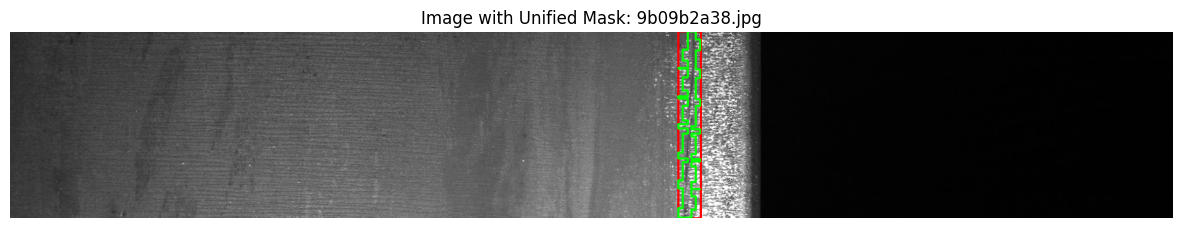

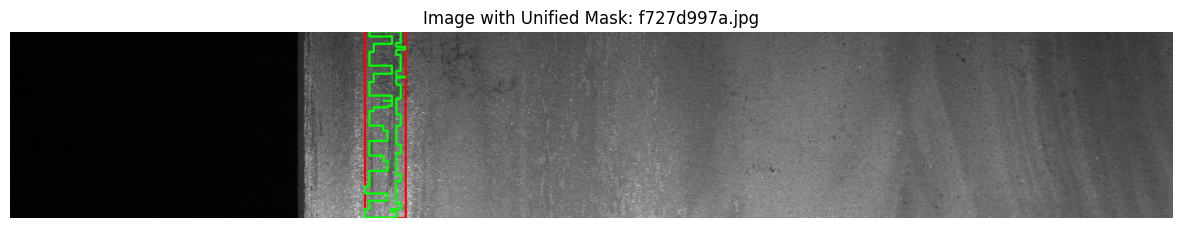

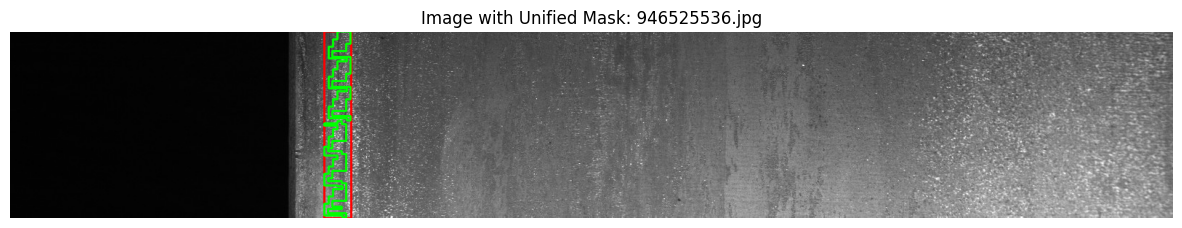

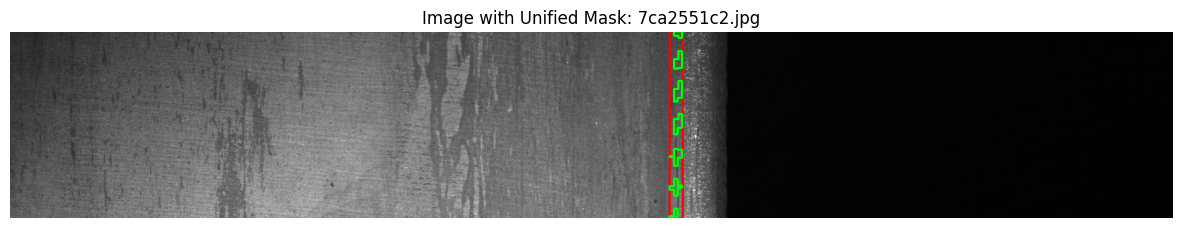

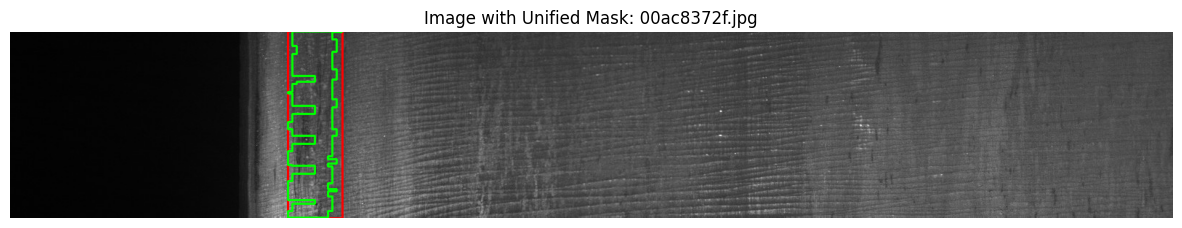

In [ ]:
# Function to display unified masks for 5 random images
def display_random_images_with_masks(filtered_df, image_folder, num_images=5):
    """
    Randomly selects a few images with defects, combines masks, and visualizes them.

    Args:
        filtered_df (pandas.DataFrame): Filtered dataframe containing ImageId and EncodedPixels.
        image_folder (str): Path to the folder containing images.
        num_images (int): Number of random images to display.
    """
    # Select up to 'num_images' random ImageIds
    random_images = random.sample(list(filtered_df["ImageId"].unique()), min(num_images, len(filtered_df)))

    for image_id in random_images:
        # Get all defect masks for the selected image
        masks = []
        for _, row in filtered_df[filtered_df["ImageId"] == image_id].iterrows():
            masks.append(rle_to_mask(row["EncodedPixels"]))

        # Combine and unify masks
        unified_mask = combine_and_unify_mask(masks)

        # Visualize the image with the unified mask
        image_path = os.path.join(image_folder, image_id)
        visualize_image_with_unified_mask(image_path, unified_mask)

# Call the function for 5 random images
display_random_images_with_masks(filtered_df, image_folder, num_images=5)